**Houses Price prediction**


Importing Libraries and Regression Model

In [21]:
import numpy as np
import pandas as pd

Loading Dataset from url as it is not available on sklearn dataset  

In [22]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Feature and target variable



 Variables in order:
 1. CRIM     per capita crime rate by town
 2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 3. INDUS    proportion of non-retail business acres per town
 4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 5. NOX      nitric oxides concentration (parts per 10 million)
 6. RM       average number of rooms per dwelling
 7. AGE      proportion of owner-occupied units built prior to 1940
 8. DIS      weighted distances to five Boston employment centres
 9. RAD      index of accessibility to radial highways
 10. TAX      full-value property-tax rate per $10,000
 11. PTRATIO  pupil-teacher ratio by town

 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13. LSTAT    % lower status of the population
 14. MEDV     Median value of owner-occupied homes in $1000's (Price)



In [23]:
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]
df = pd.DataFrame(data, columns=columns)
df['PRICE'] = target

In [24]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [25]:
X = df[['RM']]
y = df['PRICE']

In [26]:
print(X)
print(y)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


Splitting data for 80% for training and 20% for testing

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Basic Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Print model's coefficients(slope) and Intercept

In [29]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [9.34830141]
Intercept: -36.24631889813795


Prediction using test data

In [30]:
y_pred = model.predict(X_test)

Mean Square Error

In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 46.144775347317264


Visualize the regression line and data points.

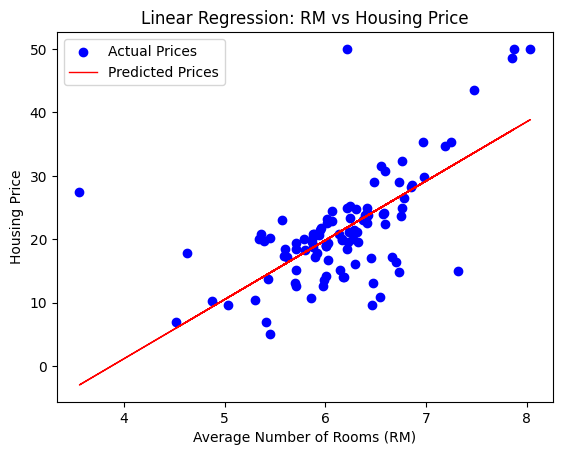

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Housing Price')
plt.title('Linear Regression: RM vs Housing Price')
plt.legend()
plt.show()